# Transformadas discretas

<p align="center">
  <img src="Imagens/logo_virtus2.png" width="300"/>
</p>

# Sumário

1. [Trasnformada de Fourier discreta (DFT)](#dft)

    1.1 [Convoluções linear e circular](#lincirc)

    1.2 [Método de Sobreposição e Soma](#soma)
    
    1.3 [Método de Sobreposição e Armazenamento](#armazenamento)

## 1. Tranformada de Fourier discreta (DFT)

A tranformada de Fourier discreta é caracterizada como sendo o processo de amostragem da transmforada de fourier, periódica em $2\pi$ tomando-se N amostras uniformemente espaçadas entre 0 e $2\pi$. Utilizando as frequências $\omega _k = (2\pi /N) k, \quad k \in \mathbb{Z}$, tal que:

$$
X'(e^{j\omega}) = X(e^{j\omega}) \sum_{k=-\infty}^{\infty} \delta\left(\omega - \frac{2\pi}{N}k\right) \tag{1}
$$

Aplicando o teorema da convolução e a transformada inversa às amostras obtidas, nós podemos relacionar o sinal $x(t)$cuja transformada de Fourier é $X(j\omega)$ com o sinal $x'(t)$ obtido a partir da amostragem o espectro do sinal de $x(t)$ de tamanho L da seguinte forma:

$$
x'(n) = x(n) * \frac{N}{2\pi} \sum_{p=-\infty}^{\infty} \delta(n - Np) = \frac{N}{2\pi} \sum_{p=-\infty}^{\infty} x(n - Np) \tag{2}
$$

Essa equação mostra que o sinal $x'(t)$ é composto por repetições periódicas do sinal discreto original $x(n)$, em que o período é dado por $N$. Logo, o sinal só pode er recuperado se seu tamanho $L\leq N$

Podemos recuperar o sinal discreto original a partir das amostras de seu espectro pela relação:

$$
x(n) = \frac{1}{N} \sum_{k=0}^{N-1} X\left(e^{j\left(\frac{2\pi}{N}\right)k}\right) e^{j\left(\frac{2\pi}{N}\right)kn}, \quad \text{para } 0 \leq n \leq N - 1. \tag{3}
$$

Esssa relação é conhecida como Tranformada de Fourier Discreta Inversa (IDFT)

Se definirmos $W_N = e^{-j2\pi /N}$,as definições da DFT e da IDFT se tornam:

$$
X(k) = \sum_{n=0}^{N-1} x(n)\, W_N^{kn}, \quad \text{para } 0 \leq k \leq N - 1. \tag{4}
$$

$$
x(n) = \frac{1}{N} \sum_{k=0}^{N-1} X(k)\, W_N^{-kn}, \quad \text{para } 0 \leq n \leq N - 1. \tag{5}
$$

em que tanto $x(n)$ como $X(k)$ são periódicas com período N

In [1]:
import numpy as np
import matplotlib.pyplot as plt


def DFT(x, N):
    '''Compute the N-point Discrete Fourier Transform of a 1D array x with length L.
    If N > L, zero-pad x to length N.
    
    Parameters:
    x : 1D array
    N : int        Length of the DFT.

    Returns:
    X : 1D array   DFT of x.
    '''

    W_N = np.exp(-1j * 2 * np.pi / N)
    X = np.zeros(N, dtype=complex)
    if len(x) < N:
        x = np.pad(x, (0, N - len(x)), 'constant') # Zero-padding
    for k in range(N):
        for n in range(len(x)):
            X[k] += x[n] * W_N**(k*n)

    return (1/np.sqrt(N))*X

def IDFT(X, N):
    '''Compute the N-point Inverse Discrete Fourier Transform of a 1D array X with length N.

    Parameters:
    X : 1D array
    N : int        Length of the IDFT.

    Returns:
    x : 1D array   IDFT of X.
    '''

    W_N = np.exp(-1j * 2 * np.pi / N)
    x = np.zeros(N, dtype=complex)
    for n in range(N):
        for k in range(N):
            x[n] += X[k] * W_N**(-k*n)
    return (1/np.sqrt(N))*x


c:\Users\jezrael.filgueiras\anaconda3\Lib\site-packages\matplotlib\cbook.py:1709: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
c:\Users\jezrael.filgueiras\anaconda3\Lib\site-packages\matplotlib\cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


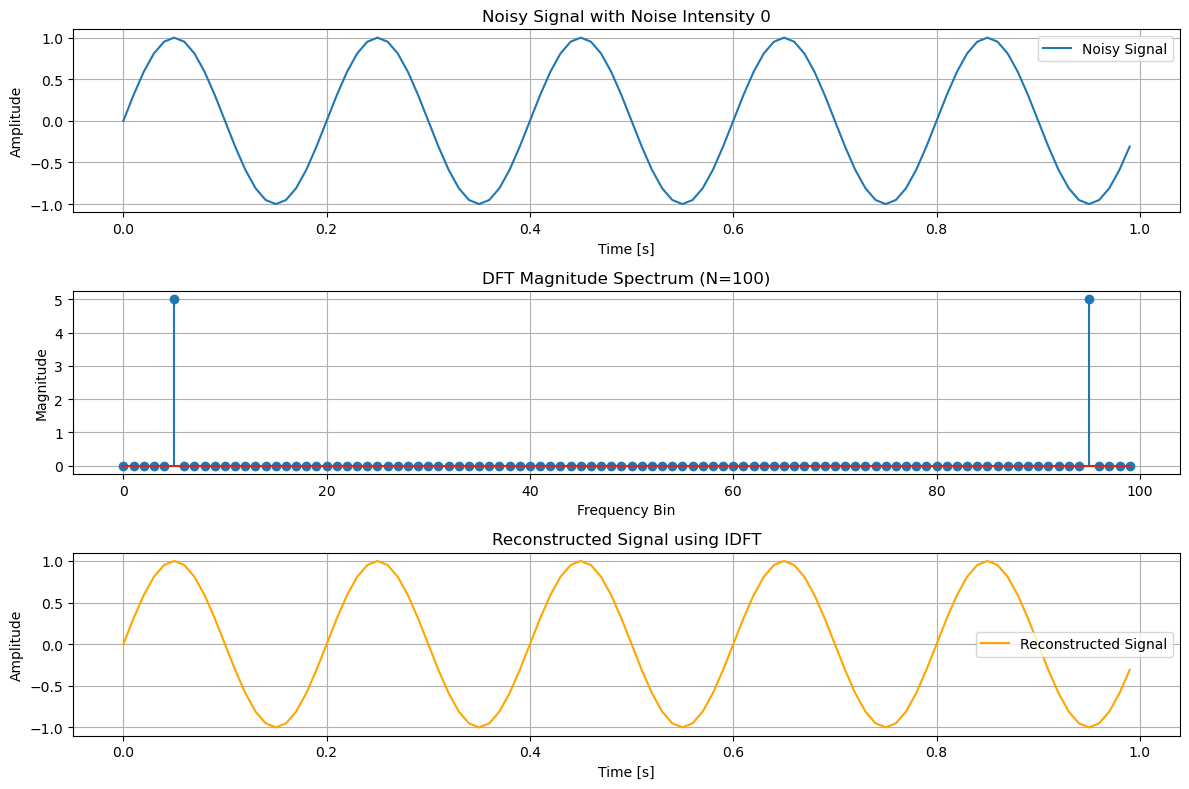

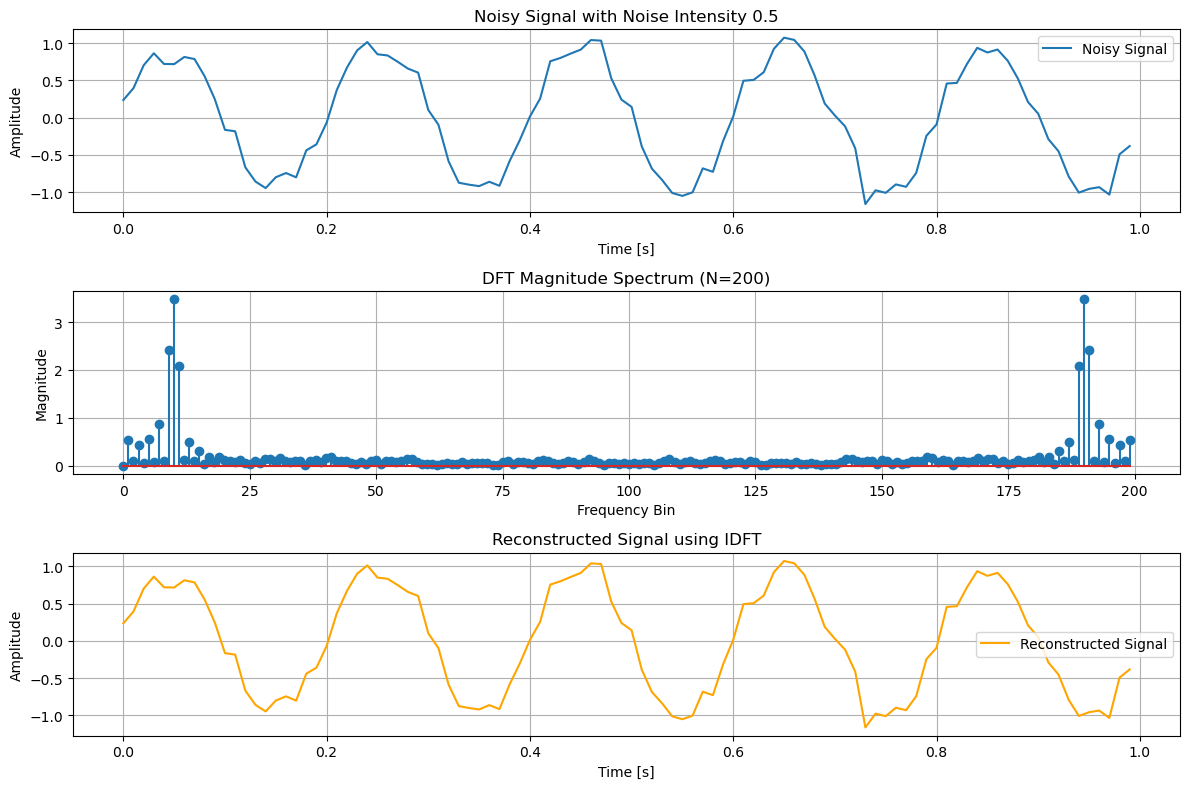

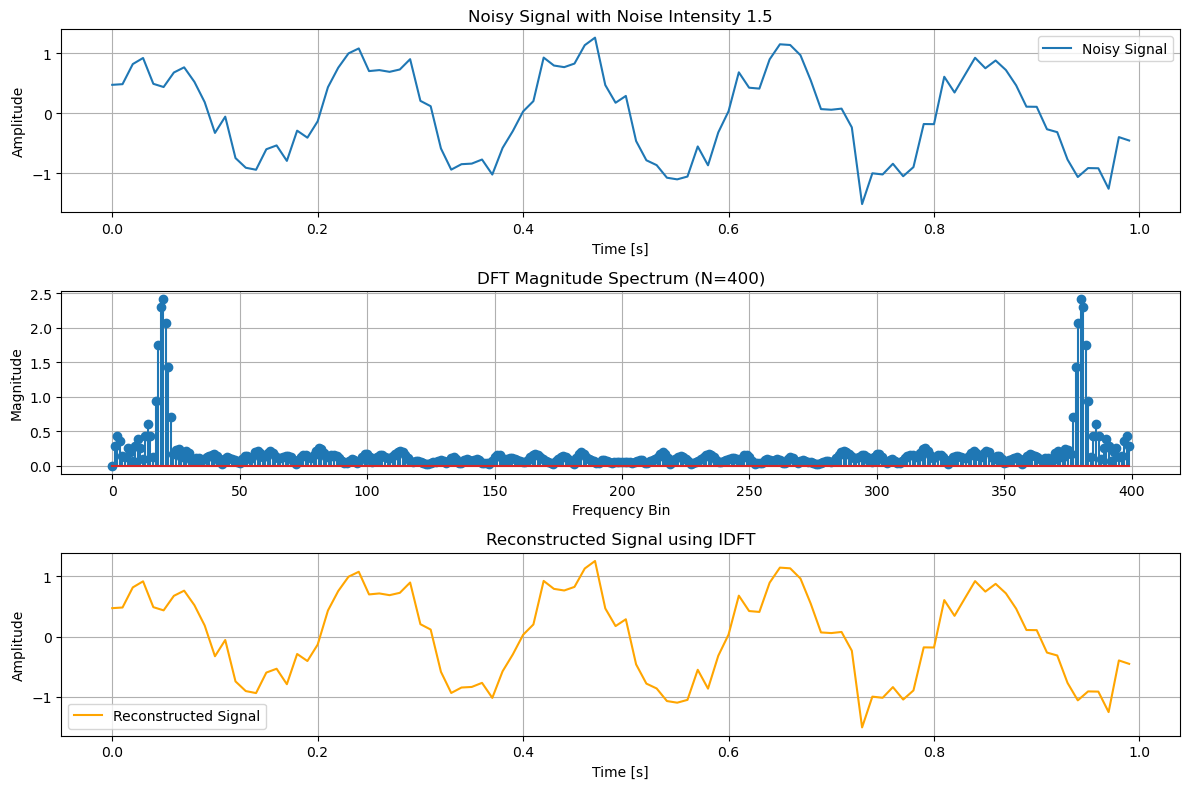

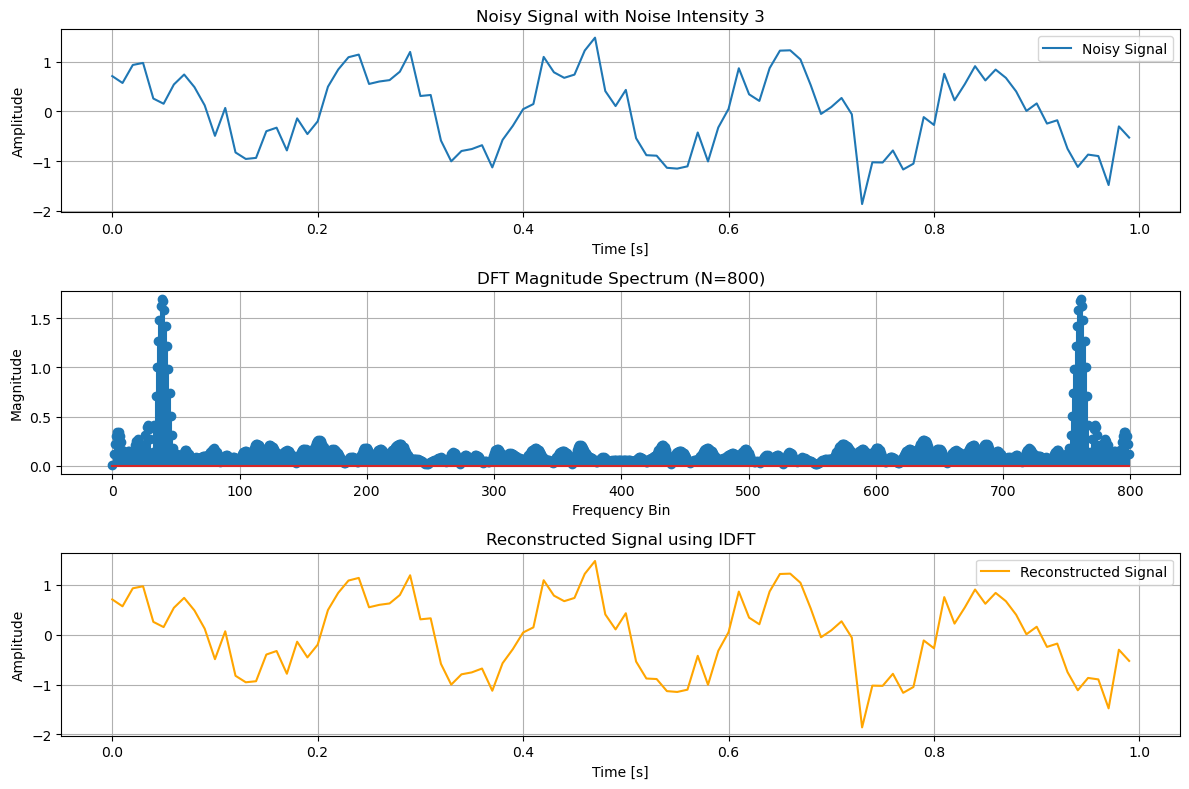

In [6]:
fs = 100   # Sampling frequency
t = np.arange(0, 1, 1/fs)   # Time vector
f = 5    # Frequency of the sine wave
x = np.sin(2 * np.pi * f * t)    # Sine wave
k = [0,0.5, 1.5, 3]    # Noise intensities
noise = np.random.normal(0, 0.1, x.shape)    # Gaussian noise
L = len(x)    # Length of the signal
N = [L, 2*L, 4*L, 8*L]    # Different DFT lengths

for i in range(len(k)):
    x_noisy = x + i*noise    # Noisy signal
    X = DFT(x_noisy, N[i])    # DFT of the noisy signal
    x_reconstructed = IDFT(X, N[i])    # Reconstructed signal using IDFT

    # Plotting
    plt.figure(figsize=(12, 8))

    plt.subplot(3, 1, 1)
    plt.plot(t, x_noisy, label='Noisy Signal')
    plt.title(f'Noisy Signal with Noise Intensity {k[i]}')
    plt.xlabel('Time [s]')
    plt.ylabel('Amplitude')
    plt.legend()
    plt.grid()

    plt.subplot(3, 1, 2)
    plt.stem(np.abs(X))
    plt.title(f'DFT Magnitude Spectrum (N={N[i]})')
    plt.xlabel('Frequency Bin')
    plt.ylabel('Magnitude')
    plt.grid()

    plt.subplot(3, 1, 3)
    plt.plot(t, x_reconstructed[:L], label='Reconstructed Signal', color='orange')
    plt.title('Reconstructed Signal using IDFT')
    plt.xlabel('Time [s]')
    plt.ylabel('Amplitude')
    plt.legend()
    plt.grid()

    plt.tight_layout()
    plt.show()
